In [ ]:
!pip install keras-cv==0.6.0 -q
!pip install -U tensorflow -q
!pip install keras-core -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.3/756.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 10.0 MB/s eta 0:00:00


In [ ]:
from textwrap import wrap
import os
import keras_cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.experimental.numpy as tnp
from keras_cv.models.stable_diffusion.clip_tokenizer import SimpleTokenizer
from keras_cv.models.stable_diffusion.diffusion_model import DiffusionModel
from keras_cv.models.stable_diffusion.image_encoder import ImageEncoder
from keras_cv.models.stable_diffusion.noise_scheduler import NoiseScheduler
from keras_cv.models.stable_diffusion.text_encoder import TextEncoder
from tensorflow import keras

Using TensorFlow backend


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ren_model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [ ]:
ren_model.diffusion_model.load_weights('/content/drive/MyDrive/renaissance_model.h5')

In [ ]:
 img = ren_model.text_to_image(
        prompt="A beautiful horse running through a field",
        batch_size=1,  # How many images to generate at once
        num_steps=25,  # Number of iterations (controls image quality)
        seed=123,  # Set this to always get the same image from the same prompt
    )

198180272/198180272 [==============================] - 1s 0us/step
saved at horse.png


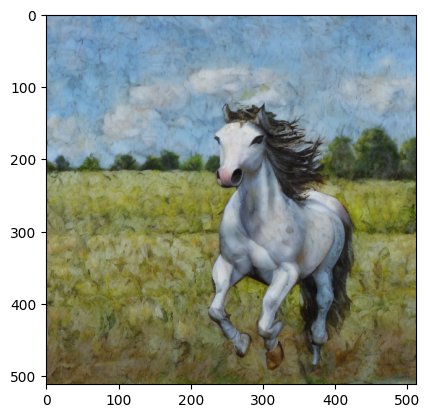

In [ ]:
img = Image.open("horse.png")
plt.imshow(img)

In [ ]:
def plot_images(images):
    plt.figure(figsize=(5, 5))
    plt.imshow(images)
    plt.axis("off")

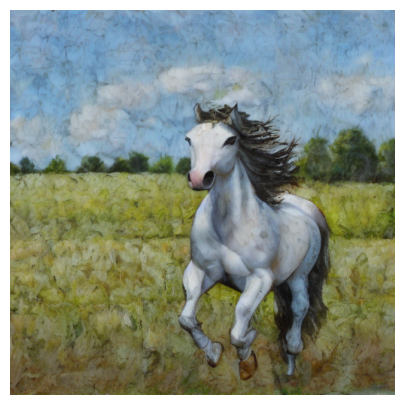

In [ ]:
plot_images(img)

In [ ]:
#### ctrl Space for suggestions
ren_model.diffusion_model.summary()

Model: "diffusion_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 320)]                0         []                            
                                                                                                  
 dense (Dense)               (None, 1280)                 410880    ['input_2[0][0]']             
                                                                                                  
 input_3 (InputLayer)        [(None, 64, 64, 4)]          0         []                            
                                                                                                  
 activation (Activation)     (None, 1280)                 0         ['dense[0][0]']               
                                                                                    

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('renaissance_model.h5')

OSError: No file or directory found at renaissance_model.h5